In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
#load dataset
contentDf = pd.read_csv('Content.csv')
contentDf.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [19]:
reactionTypeDf = pd.read_csv('ReactionTypes.csv')
reactionDf = pd.read_csv('Reactions.csv')

In [20]:
reactionTypeDf.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [21]:
reactionDf.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


# Data Cleaning

In [22]:
#first do cleaning in Content Data
contentDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [23]:
#null
contentDf.isnull().sum()

,0
Unnamed: 0,0
Content ID,0
User ID,0
Type,0
Category,0
URL,199


In [24]:
#show null columns
contentDf[contentDf.isnull().any(axis=1)]

,Unnamed: 0,Content ID,User ID,Type,Category,URL
5,5,cf1e8c1a-23eb-4426-9f58-002fb1b53e91,4607d7b0-3313-49b8-9f73-5b8227fc5b67,GIF,cooking,NaN
10,10,5118e9c5-1377-4cc5-a486-65b35b7b7b76,ef56931b-540b-4166-9090-73ae48ac8d97,GIF,science,NaN
15,15,7ffd0a82-4a0a-4527-a4d6-e251b756bac7,425b7021-0409-4358-af39-2bff14197d0a,GIF,fitness,NaN
20,20,baa2db00-81ba-4c34-b17d-dd950bfa133b,2f112802-2501-45b5-a9d9-470cda6ef23e,GIF,soccer,NaN
25,25,a4067fb5-3ba8-4f97-87c2-ddad5e4029c2,e2377b94-f06a-49ed-a266-377c4b07e980,GIF,food,NaN
...,...,...,...,...,...,...
975,975,9c8f1389-d04e-4a55-a2f5-1612539b70a7,4edc3d1a-a7d9-4db6-89c3-f784d9954172,audio,technology,NaN
980,980,54e29395-9eba-4945-abee-cad58cbab090,ad9f5c2f-aa30-4baf-b084-56b1a4b63b09,video,Science,NaN
985,985,a973290c-989a-44d2-afb9-9b4bf16cc17f,04e52602-e370-4a99-bfda-f0c1655058da,video,tennis,NaN
990,990,2e32de07-dc79-4cdc-bf1d-bac90ba3fd85,ad4bd878-55e7-487c-a4db-470b23bbd832,video,studying,NaN


In [25]:
# drop the URL column since it is unnecesary
contentDf.drop('URL', axis=1, inplace=True)

In [26]:
contentDf.head()

,Unnamed: 0,Content ID,User ID,Type,Category
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food


In [27]:
contentDf.shape

(1000, 5)

In [28]:
contentDf.isnull().sum()

,0
Unnamed: 0,0
Content ID,0
User ID,0
Type,0
Category,0


In [29]:
#lets check for category column
contentDf['Category'].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', '"culture"', 'Fitness', '"studying"',
       'Veganism', '"animals"', 'Travel', '"soccer"', 'Education',
       '"dogs"', 'Technology', 'Soccer', '"tennis"', 'Culture', '"food"',
       'Food', '"technology"', 'Healthy Eating', '"cooking"', 'Science',
       '"public speaking"', '"veganism"', 'Public Speaking', '"science"'],
      dtype=object)

In [34]:
#Replace the " with no value
contentDf['Category'] = contentDf['Category'].str.replace('"', '')
contentDf['Category'].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', 'Fitness', 'Veganism', 'Travel', 'Education',
       'Technology', 'Soccer', 'Culture', 'Food', 'Healthy Eating',
       'Science', 'Public Speaking'], dtype=object)

In [35]:
#here Food and food are same so make all Category in small case
contentDf['Category'] = contentDf['Category'].str.lower()
contentDf['Category'].unique()

array(['studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'veganism', 'animals', 'culture'],
      dtype=object)

In [37]:
contentDf.columns

Index(['Unnamed: 0', 'Content ID', 'User ID', 'Type', 'Category'], dtype='object')

In [38]:
#rename 'Type' with 'Content Type'
contentDf.rename(columns={'Type':'Content Type'}, inplace=True)

In [39]:
contentDf.columns

Index(['Unnamed: 0', 'Content ID', 'User ID', 'Content Type', 'Category'], dtype='object')

In [40]:
#save the clean data in new csv file
contentDf.to_csv('CleanContent.csv', index=False)


In [41]:
#SEcond do cleaning in ReactionTypes Data
reactionTypeDf.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [42]:
reactionTypeDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16 non-null     int64 
 1   Type        16 non-null     object
 2   Sentiment   16 non-null     object
 3   Score       16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 640.0+ bytes


In [43]:
reactionTypeDf.isnull().sum()

,0
Unnamed: 0,0
Type,0
Sentiment,0
Score,0


In [44]:
reactionTypeDf['Type'].unique()

array(['heart', 'want', 'disgust', 'hate', 'interested', 'indifferent',
       'love', 'super love', 'cherish', 'adore', 'like', 'dislike',
       'intrigued', 'peeking', 'scared', 'worried'], dtype=object)

In [45]:
# clean another dataset REactions
reactionDf.head()


,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [46]:
reactionDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25553 non-null  int64 
 1   Content ID  25553 non-null  object
 2   User ID     22534 non-null  object
 3   Type        24573 non-null  object
 4   Datetime    25553 non-null  object
dtypes: int64(1), object(4)
memory usage: 998.3+ KB


In [47]:
reactionDf.isnull().sum()

,0
Unnamed: 0,0
Content ID,0
User ID,3019
Type,980
Datetime,0


There are null values in UserID and Type

In [48]:
reactionDf.columns

Index(['Unnamed: 0', 'Content ID', 'User ID', 'Type', 'Datetime'], dtype='object')

In [49]:
#here UserID is not necessary for our analysis so lets delete it
reactionDf.drop('User ID', axis=1, inplace=True)
reactionDf.isnull().sum()

,0
Unnamed: 0,0
Content ID,0
Type,980
Datetime,0


In [50]:
#remove the null values in Type
reactionDf = reactionDf.dropna(subset=['Type'])
reactionDf.isnull().sum()

,0
Unnamed: 0,0
Content ID,0
Type,0
Datetime,0


In [53]:
# so now we have clean data

print("Content Data Size: "+str(contentDf.shape))
print("Reaction Type Data Size: "+str(reactionTypeDf.shape))
print("Reaction Data Size: "+str(reactionDf.shape))

Content Data Size: (1000, 5)
Reaction Type Data Size: (16, 4)
Reaction Data Size: (24573, 4)


In [54]:
#save cleaned reaction data
reactionDf.to_csv('CleanReactions.csv', index=False)

# Data Modeling

#### Merge the data
We recommend using the Reaction table as your base table, then first join the relevant columns from your Content data set, and then the Reaction Types data set.

In [58]:
# load clean data
contentDf = pd.read_csv('CleanContent.csv')
reactionDf = pd.read_csv('CleanReactions.csv')
reactionTypeDf = pd.read_csv('ReactionTypes.csv')

In [59]:
print("Columns of Reaction dataset: ", reactionDf.columns)
print("Columns of Content dataset: ", contentDf.columns)
print("Columns of Reaction Type dataset: ", reactionTypeDf.columns)

Columns of Reaction dataset:  Index(['Unnamed: 0', 'Content ID', 'Type', 'Datetime'], dtype='object')
Columns of Content dataset:  Index(['Unnamed: 0', 'Content ID', 'User ID', 'Content Type', 'Category'], dtype='object')
Columns of Reaction Type dataset:  Index(['Unnamed: 0', 'Type', 'Sentiment', 'Score'], dtype='object')


In [61]:
#merge the two datasets with reaction tabel as base table and join Content dataset then reaction type dataset
mergedDf = reactionDf.merge(contentDf, on='Content ID', how='left')
mergedDf = mergedDf.merge(reactionTypeDf, on='Type', how='left')

In [62]:
mergedDf.head()

,Unnamed: 0_x,Content ID,Type,Datetime,Unnamed: 0_y,User ID,Content Type,Category,Unnamed: 0,Sentiment,Score
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,2,negative,0
1,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,11,negative,10
2,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,14,negative,15
3,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,2,negative,0
4,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,0,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,4,positive,30


In [63]:
mergedDf.columns

Index(['Unnamed: 0_x', 'Content ID', 'Type', 'Datetime', 'Unnamed: 0_y',
       'User ID', 'Content Type', 'Category', 'Unnamed: 0', 'Sentiment',
       'Score'],
      dtype='object')

In [73]:
mergedDf.isnull().sum()

,0
Unnamed: 0_x,0
Content ID,0
Type,0
Datetime,0
Unnamed: 0_y,0
User ID,0
Content Type,0
Category,0
Unnamed: 0,0
Sentiment,0


## 2.  Figure out the Top 5 performing categories

In [66]:
mergedDf['Category'].unique()

array(['studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'veganism', 'animals', 'culture'],
      dtype=object)

In [69]:
mergedDf.groupby('Category')['Score'].sum()

,Score
Category,
animals,74965
cooking,64756
culture,66579
dogs,52511
education,57436
fitness,55323
food,66676
healthy eating,69339
public speaking,49264


In [70]:
##Figure out the Top 5 performing categories based on score
# Add up the total scores for each category.
category_scores = mergedDf.groupby('Category')['Score'].sum()

# Sort the categories by their total scores in descending order.
top_categories = category_scores.sort_values(ascending=False)


In [71]:
print("Top 5 cateogries are: ", top_categories.head(5))

Top 5 cateogries are:  Category
animals           74965
science           71168
healthy eating    69339
technology        68738
food              66676
Name: Score, dtype: int64


In [74]:
# Save the clean dataset of top 5 cateogries
top_categories.head(5).to_csv('Top5Categories.csv')

In [76]:
mergedDf.head()
#save mergedDf
mergedDf.to_csv('CleanMergedData.csv', index=False)


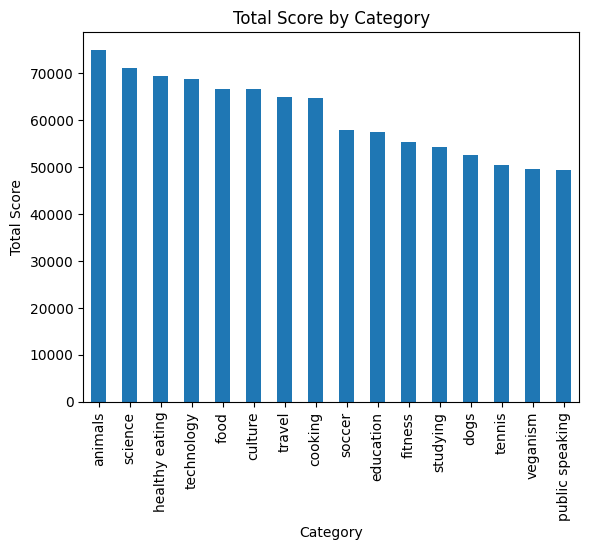

In [78]:
#plot the scores based on categoriesin sorted order
mergedDf.groupby('Category')['Score'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Total Score')
plt.title('Total Score by Category')
plt.show()
